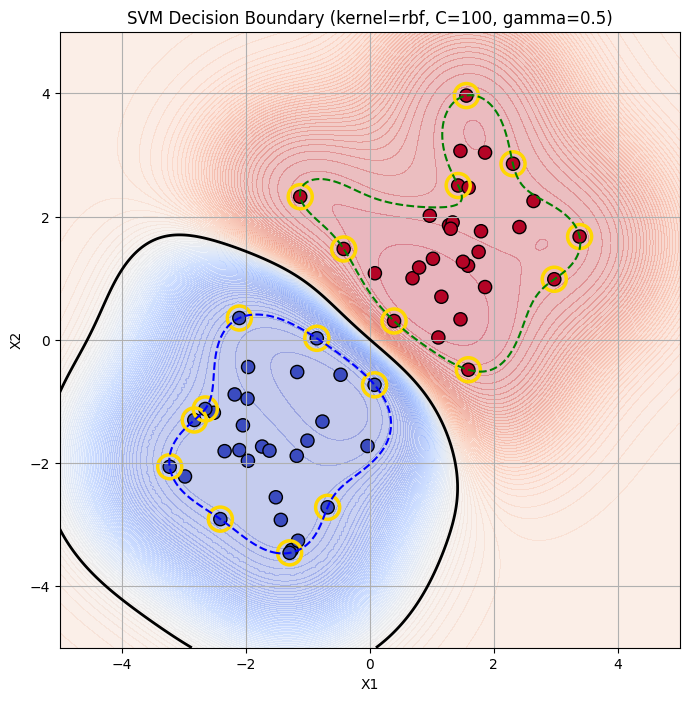

In [2]:
# --- کتابخانه‌ها ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# --- داده‌ها ---
np.random.seed(42)
X_class0 = np.random.randn(30,2) - 1.5
X_class1 = np.random.randn(30,2) + 1.5

X = np.vstack([X_class0,X_class1])
y = np.array([0]*len(X_class0) + [1]*len(X_class1))

# --- پارامترهای SVM ---
kernel = 'rbf'    # گزینه‌ها: 'linear', 'poly', 'rbf', 'sigmoid'
C_val = 100
gamma_val = 0.5   # برای kernel غیر rbf یا poly، تاثیری ندارد

# --- مدل ---
# از probability=True برای gradient decision boundary استفاده می‌کنیم
model = SVC(kernel=kernel, C=C_val, gamma=gamma_val, probability=True)
model.fit(X, y)

# --- شبکه نقاط برای رسم ---
xx, yy = np.meshgrid(np.linspace(-5,5,300), np.linspace(-5,5,300))
Z_prob = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
Z_dec = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# --- نمودار ---
plt.figure(figsize=(8,8))

# مرز تصمیم gradient
plt.contourf(xx, yy, Z_prob, levels=100, cmap='coolwarm', alpha=0.3)

# خطوط decision boundary و margin
plt.contour(xx, yy, Z_dec, levels=[0], colors='k', linewidths=2)        # Decision boundary
plt.contour(xx, yy, Z_dec, levels=[-1,1], colors=['blue','green'], linestyles='--', linewidths=1.5)  # Margin

# نقاط و support vectorها
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=90, edgecolors='k')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], 
            s=300, facecolors='none', edgecolors='gold', linewidths=2.5)

plt.title(f"SVM Decision Boundary (kernel={kernel}, C={C_val}, gamma={gamma_val})")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()
